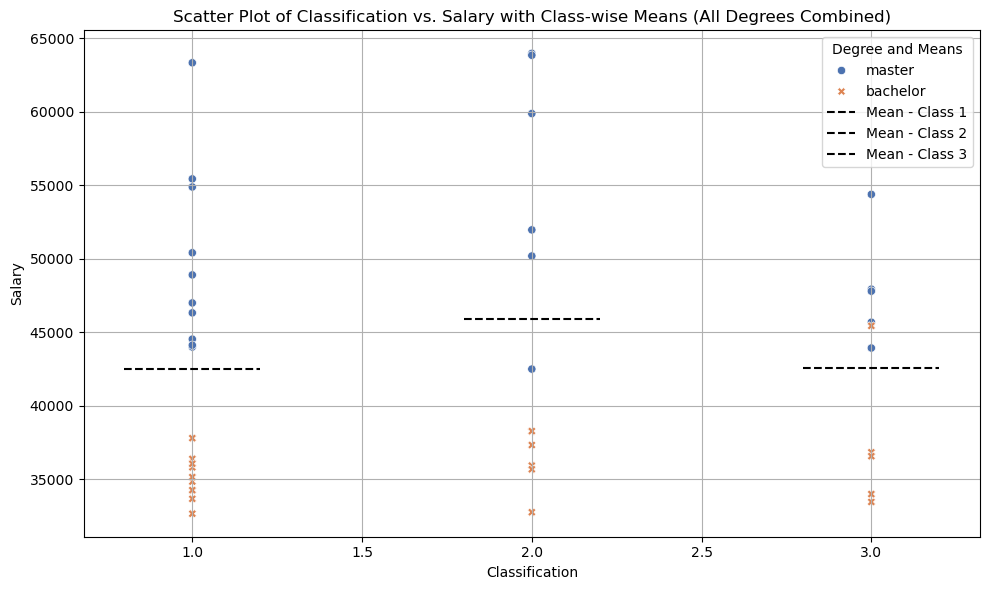

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel("薪水.xlsx", sheet_name="工作表1")
# 清除缺失值
valid_df = df[['degree', 'classification', 'salary']].dropna()

# 計算不分學歷的分類平均薪資
mean_salaries_combined = valid_df.groupby('classification')['salary'].mean()

# 畫圖
plt.figure(figsize=(10, 6))
sns.scatterplot(data=valid_df, x='classification', y='salary', hue='degree', palette='deep', style='degree')

# 加上平均薪資虛線（不分學歷）
for cls, mean_salary in mean_salaries_combined.items():
    plt.hlines(y=mean_salary, xmin=int(cls)-0.2, xmax=int(cls)+0.2,
               colors='black', linestyles='dashed', label=f'Mean - Class {cls}')

plt.xlabel("Classification")
plt.ylabel("Salary")
plt.title("Scatter Plot of Classification vs. Salary with Class-wise Means (All Degrees Combined)")
plt.legend(title="Degree and Means")
plt.grid(True)
plt.tight_layout()
plt.show()